Programación para la ciencia de datos
============================

--- 

SDSS-DR7 Dataset transformation
-----------------------------------------------------

In [18]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
base_folder = os.getenv('PROJECT_TFM')
dt = pd.read_csv(base_folder+'\\data\\sdss\\BOSS-query.csv')
dt

,specObjID,ra,dec,z
0,5011612850084048896,122.697543,29.472926,0.498558
1,5011613949595676672,122.680348,29.442162,0.518157
2,5011622195932884992,122.566412,29.684050,0.623175
3,5006999299377786880,122.574469,29.830981,0.550188
4,5011620546665443328,122.640096,29.949537,0.620201
...,...,...,...,...
11292,5048701027026137088,128.089116,20.681026,0.610173
11293,5048735111886598144,128.839131,20.881454,0.595723
11294,5048734012374970368,128.869528,20.870121,0.539972
11295,5041795544835092480,128.059947,21.570393,0.706878


In [19]:
dt.shape

(11297, 4)

In [20]:
import math


def integrand(x):
    r = 0.0001
    m = 0.3
    v = 0.7
    return 1/math.sqrt(r*(1+x)**4 + m *(1+x)**3 + v)

def compute_distance(z):
    i= quad(integrand, 0, z, args=())
    return i[0];


H0 = 70 # Hubble constanst
def parse_distance_megaparsecs(d):
    '''
    Parse raw distances to h-1Mpc
    #977.8 coefficent for converting 1/H into Gyr (Hubble time)
    (H0/100) * d * 977.8 * 1000 /(3.262*H0)  
    '''
    #return  (H0/100) * d * 977.8 * 1000 /(3.262*H0)  
    return d * 977.8 * 10 /(3.262)

dt['dist'] = dt.apply(lambda row: compute_distance(row.z), axis=1)
dt['dist'] = dt.apply(lambda row: parse_distance_megaparsecs(row.dist), axis=1)
#df_subset = df_subset.query('distt <= 375')
#df_subset = df_subset.query('distt >= 61')
dt

,specObjID,ra,dec,z,dist
0,5011612850084048896,122.697543,29.472926,0.498558,1318.443705
1,5011613949595676672,122.680348,29.442162,0.518157,1363.109412
2,5011622195932884992,122.566412,29.684050,0.623175,1593.771703
3,5006999299377786880,122.574469,29.830981,0.550188,1434.997721
4,5011620546665443328,122.640096,29.949537,0.620201,1587.436521
...,...,...,...,...,...
11292,5048701027026137088,128.089116,20.681026,0.610173,1565.992610
11293,5048735111886598144,128.839131,20.881454,0.595723,1534.863205
11294,5048734012374970368,128.869528,20.870121,0.539972,1412.217081
11295,5041795544835092480,128.059947,21.570393,0.706878,1767.529504


In [22]:
min(dt['dist'])
max(dt['dist'])
#max(dt['z'])

2310.1135328853406

In [3]:
min_ra = 120
max_ra = 150
min_dec = 10
max_dec = 30
min_dist = 60
max_dist = 320

In [4]:
df_subset = dt.query('dist <= {}'.format(max_dist))
df_subset = df_subset.query('dist >= {}'.format(min_dist))

df_subset = df_subset.query('ra >= {}'.format(min_ra))
df_subset = df_subset.query('ra <= {}'.format(max_ra))

df_subset = df_subset.query('dec >= {}'.format(min_dec))
df_subset = df_subset.query('dec <= {}'.format(max_dec))
data = df_subset
data

,GAL_ID,ra,dec,x,y,z,redshift,dist,GROUP_ID
185286,839618,120.173856,27.472810,-62.290360,107.137973,64.439122,0.047105,139.681905,1278
185287,839627,121.003242,28.215199,-129.545394,215.572108,134.940195,0.097396,285.415835,186291
185295,839644,121.620739,28.700792,-94.986656,154.273453,99.191226,0.070028,206.546998,186299
185296,839645,121.801098,28.672385,-105.949644,170.871969,109.947724,0.077835,229.152916,186300
185297,839646,121.724139,28.820089,-66.020313,106.795333,69.081492,0.048341,143.304492,186301
...,...,...,...,...,...,...,...,...,...
639102,2505999,149.749623,15.699583,-73.381136,42.795260,23.877243,0.029638,88.240286,68157
639103,2506000,149.818877,15.572712,-105.152148,61.153642,33.900577,0.042540,126.277438,472283
639105,2506002,149.834568,15.584550,-264.843138,153.928548,85.438845,0.108818,318.018367,68158
639107,2506004,149.916800,15.595854,-206.706860,119.742815,66.679270,0.084373,248.016518,472285


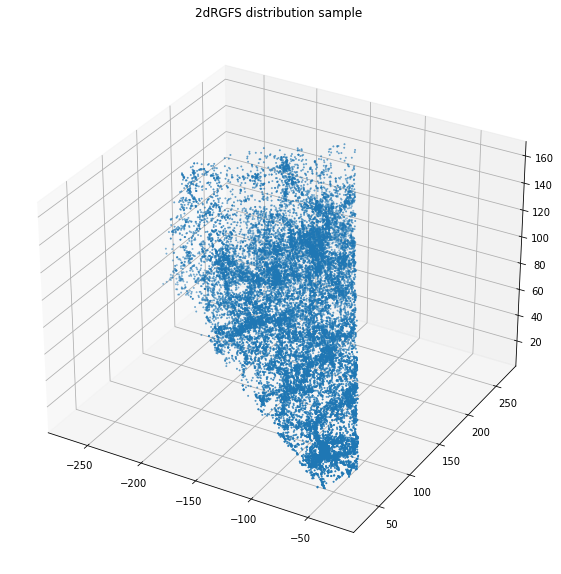

In [5]:

xx = data['x']
yx = data['y']
zx = data['z']

plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
plt.title("2dRGFS distribution sample")
ax.scatter(xx, yx, zx, s=2, linewidth=0.5)
plt.show()

In [6]:
def to_radians(angle):
    return (angle * math.pi / 180)


min_ra_rad = to_radians(min_ra)
max_ra_rad = to_radians(max_ra)
min_dec_rad = to_radians(min_dec)
max_dec_rad = to_radians(max_dec)

In [7]:
# Podemos hacer el ejercicio usando las funciones de numpy
import numpy as np
import matplotlib.pyplot as plt

# Para cada diferencial de volumen queremos el mismo número de galaxias.
# dV = d(ro^3/3)d(sin(dec))d(ra)  --> para angúlos pequeños sin(dec) ~ dec

def ro_t(x):
    """ returns the result of x^3/3 """
    return x**3/3

# definimos función para generar el catálogo simulado

def simulateCatalog(limits, n_gal, plotRho = False):
    """A simulated catalogue of n_gal galaxies is returned in the given limits
    
       Args:
         limits: (:obj:`dict`): with keys "Dist_min", "Dist_max", "dec_min","dec_max","ra_min","ra_max"
         n_gal:  (:obj:`int`)
         
       Optional Args:
         plotRho: (:obj:`boolean`): Returns plot to see distribution of rho. 
                  
       Retruns:
         pos_cat: (:obj:`numpy array` with shape n_gal x 3): position in cartesian coordinates of the n_gal galaxies
    
    """
    if not isinstance(limits, dict):
        print('Input must by a dictionary')
        return False
    else:
        if "Dist_min" not in limits or "Dist_max" not in limits:
             raise AssertionError('Dist_min and Dist_max keys must be given')
        if "dec_min" not in limits or  "dec_max" not in limits:
             raise AssertionError('dec_min and dec_max keys must be given')
        if "ra_min" not in limits or "ra_max" not in limits:
             raise AssertionError('ra_min and ra_max keys must be given')
                   
        # Generem nombres aleatoris uniformes, amb els límits imposats 
        # i el mateix número de galàxies que el catàleg real
        ro3 = np.random.uniform(low=ro_t(limits["Dist_min"]),
                        high=ro_t(limits["Dist_max"]), size=n_gal)  
        dec = np.random.uniform(low=limits["dec_min"],
                        high=limits["dec_max"], size=n_gal)
        ra = np.random.uniform(low=limits["ra_min"],
                        high=limits["ra_max"], size=n_gal)

        # Volvemos a las coordenadas ecuatoriales 
        ro = (3*ro3)**(1/3)
        #ro = (ro3)**(1/2)
        
        if plotRho:
            _ = plt.hist(ro)  # ( _ = added to avoid unnecesary text with plot info )
            plt.xlabel(r'$\rho$')
            plt.ylabel('Number of galaxies')

        # Convertimos a coordenadas cartesianas y agrupamos en vectores
        x_cat = ro * np.cos(dec) * np.cos(ra)
        y_cat = ro * np.cos(dec) * np.sin(ra)
        z_cat = ro * np.sin(dec)
        pos_cat = np.column_stack((x_cat, y_cat, z_cat))
        
        return pos_cat 

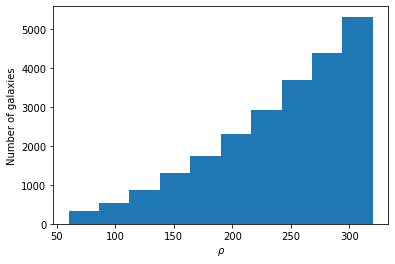

In [8]:
limits = {'ra_min': min_ra_rad, 'ra_max': max_ra_rad,
          "dec_min": min_dec_rad, "dec_max": max_dec_rad,
          "Dist_min": min_dist, "Dist_max": max_dist}

p_cat = simulateCatalog(limits, len(data), plotRho = True)

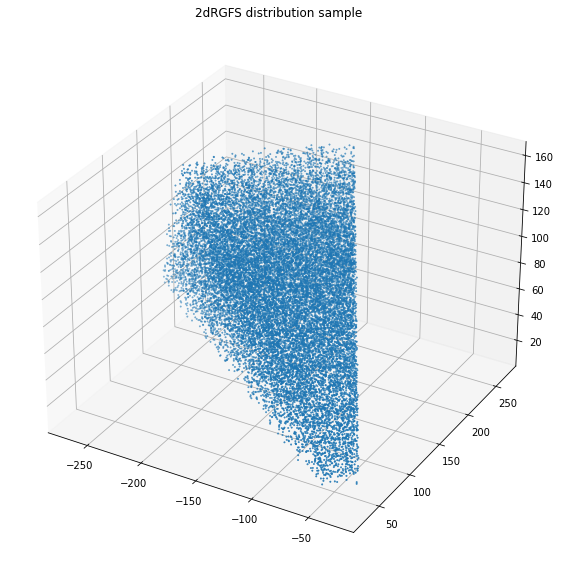

In [9]:
xx = list()
yx = list()
zx = list()
for p in p_cat:
    xx.append(p[0])
    yx.append(p[1])
    zx.append(p[2])

plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
plt.title("2dRGFS distribution sample")
ax.scatter(xx, yx, zx, s=2, linewidth=0.5)
plt.show()

In [10]:
# Tenemos que calcular el número de galaxias que hay a cierta distancia, tanto del catálogo real como del
# catálogo aleatorio. Utilizaremos Counter del módulo collections

from collections import Counter


# Definimos la distancia entre 2 puntos 
def dist3D(p1, p2):
    """ compute euclidian distance between two points p1 and p2"""
    if len(p1) != len(p2):
        raise AssertionError("x1 and x2 must be equal")
    suma = sum([(p1[i]-p2[i])**2 for i in range(len(p1))])
    return np.sqrt(suma)


# Generamos vectores con las coordenadas 
p = np.column_stack((np.array(data["x"]),
                     np.array(data["y"]), np.array(data["z"])))

# Generamos bines entre distancia mínima y máximacon pasos de uno en uno
maxDist = 350
dr = 1   # esogemos dr = 1 
bins = np.arange(0, maxDist, dr)  # generamos intérvalos de distancia


for i in range(len(p)):
    distances = np.array([dist3D(p[i], p[j]) for j in range(i+1, len(p))])
    distances_cat = np.array([dist3D(p_cat[i], p_cat[j]) for j in range(i+1, len(p))])

    digitized = np.digitize(distances, bins)          # colocamos cada distancia a su intérvalo
    digitized_cat = np.digitize(distances_cat, bins)  

    if i == 0:
        DDc = Counter(digitized)       # utilizamos Counter para contar cuantas distancias hay iguales
        RRc = Counter(digitized_cat)

    else:
        DDc.update(digitized)          # actualizamos contadores
        RRc.update(digitized_cat)

# Ordenamos DDc i RRc
DDsorted = {k: v for k, v in sorted(DDc.items())}
RRsorted = {k: v for k, v in sorted(RRc.items())}

# Lo pasamos a listas
r = list(DDsorted.keys())     # distancia
DD = list(DDsorted.values())  # número de pares del catálogo real
RR = list(RRsorted.values())  # número de pares del catálogo simulado

In [11]:
print(len(DD))
print(len(RR))

269
271


In [12]:
print(len(DD))
print(len(RR))
minimal = min(len(DD),len(RR))

if minimal <  len(DD):
    for i in list(range(len(DD)- minimal)):
        DD.pop()
        r.pop()
if minimal <  len(RR):
    for i in list(range(len(RR)- minimal)):
        RR.pop()
if minimal <  len(r):
    for i in list(range(len(r)- minimal)):
        r.pop()


269
271


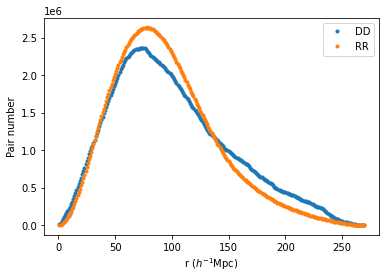

In [13]:
plt.plot(r, DD, '.', label='DD')
plt.plot(r, RR, '.', label='RR')
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel('Pair number')
plt.legend()

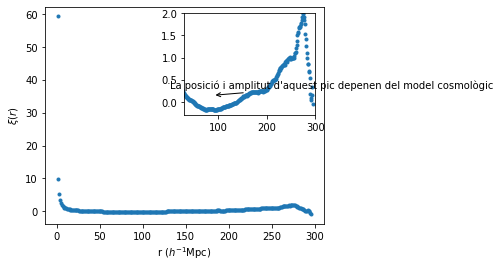

In [177]:
# Calculamos estimador natural
corr = np.array(DD)/np.array(RR) - 1

# Hacemos los gráficos
fig, ax = plt.subplots(figsize=[5, 4])
# Fem el gràfic
ax.plot(r, corr, '.')
ax.set_xlabel("r ($h^{-1}$Mpc)")
ax.set_ylabel(r"$\xi(r)$")

axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.plot(r, corr, '.')
# sub region of the original image
x1, x2, y1, y2 = 30, 300, -0.3, 2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
_ = axins.annotate("La posició i amplitut d'aquest pic depenen del model cosmològic",
                   xy=(90, 0.15), xycoords='data',
                   xytext=(0.3, 0.3), textcoords='data',
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
                   )